In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from scipy.integrate import odeint

from pinn import LorenzAttractor
from train import train
from utils import array, tensor, lorenz_de

In [ ]:
ics = [2., 2., 2.]
t0, t1 = 0., 1.

model = LorenzAttractor(ics, t0, t1)

In [4]:
train(model, epochs=1000)

  0%|          | 0/1001 [00:00<?, ?it/s]

Epoch:      0 Loss: 2.69e+01 LR: 9.0e-04 Min w: 0.00000 Rel L2: 0.97046
Epoch:     20 Loss: 3.33e+01
Epoch:     40 Loss: 3.25e+01
Epoch:     60 Loss: 3.34e+01
Epoch:     80 Loss: 3.25e+01
Epoch:    100 Loss: 3.17e+01 LR: 8.1e-04 Min w: 0.00000
Epoch:    120 Loss: 3.10e+01
Epoch:    140 Loss: 2.81e+01
Epoch:    160 Loss: 2.23e+01
Epoch:    180 Loss: 1.65e+01
Epoch:    200 Loss: 1.30e+01 LR: 7.3e-04 Min w: 0.00000 Rel L2: 2.25661
Epoch:    220 Loss: 7.97e+00
Epoch:    240 Loss: 5.78e+00
Epoch:    260 Loss: 5.43e+00
Epoch:    280 Loss: 3.46e+00
Epoch:    300 Loss: 2.58e+00 LR: 6.6e-04 Min w: 0.00000
Epoch:    320 Loss: 2.35e+00
Epoch:    340 Loss: 1.91e+00
Epoch:    360 Loss: 1.66e+00
Epoch:    380 Loss: 1.01e+00
Epoch:    400 Loss: 1.16e+00 LR: 5.9e-04 Min w: 0.00000 Rel L2: 2.56241
Epoch:    420 Loss: 6.60e-01
Epoch:    440 Loss: 6.26e-01
Epoch:    460 Loss: 4.11e-01
Epoch:    480 Loss: 4.09e-01
Epoch:    500 Loss: 4.79e-01 LR: 5.3e-04 Min w: 0.00000
Epoch:    520 Loss: 1.75e-01
Epoch: 

In [5]:
with torch.no_grad():
    t_plot = np.linspace(t0, t1, 256)
    u_pred = array(model(tensor(t_plot)))
u_test = odeint(lorenz_de, ics, t_plot)

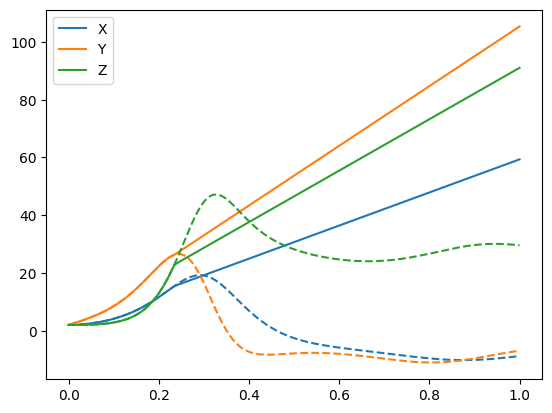

In [6]:
fig, ax = plt.subplots()
ax.plot(t_plot, u_pred[:, 0], label='X', color='C0')
ax.plot(t_plot, u_test[:, 0], '--', color='C0')
ax.plot(t_plot, u_pred[:, 1], label='Y', color='C1')
ax.plot(t_plot, u_test[:, 1], '--', color='C1')
ax.plot(t_plot, u_pred[:, 2], label='Z', color='C2')
ax.plot(t_plot, u_test[:, 2], '--', color='C2')
ax.legend()
plt.show()

In [11]:
w = [array(w) for w in model.w_]

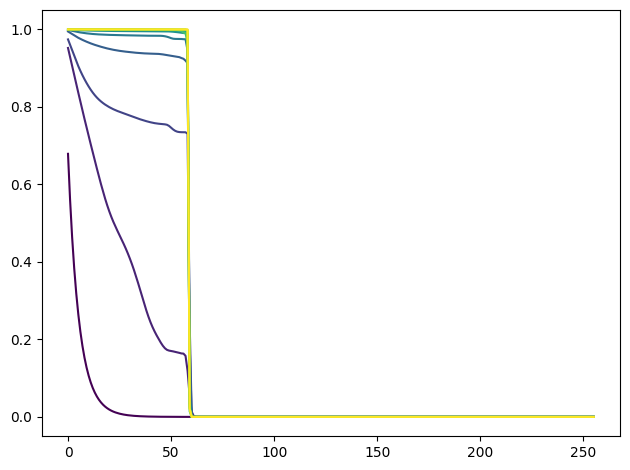

In [12]:
fig, ax = plt.subplots()
cmap = plt.get_cmap('viridis', len(w))
for i, _w in enumerate(w):
    ax.plot(_w, c=cmap(i))
fig.tight_layout()
plt.show()

In [ ]:
torch.save(model.state_dict(), 'model.pth')

In [ ]:
model = LorenzAttractor(ics, t0, t1)
model.load_state_dict(torch.load('model.pth'))

In [ ]:
# model.t = tensor(np.linspace(t[0], t[-1], 512), requires_grad=True)
# model.M = torch.triu(torch.ones((512, 512)), diagonal=1).to(device).T

In [ ]:
ics = [2.0, 2.0, 2.0]
t0, t1 = 0., .5
T = 25.

pred_list = []
for k in range(int(T / t1)):
    print(f'Final time: {(k + 1) * t1:.1f}')

    model = LorenzAttractor(ics, t0, t1)
    train(model, epochs=10000)

    with torch.no_grad():
        u_pred = array(model(model.t))

    ics = u_pred[-1, :].tolist()

    pred_list.append(u_pred)
    np.save('predictions.npy', np.array(pred_list))